#### Sensor Network Simulation 
##### *using consensus based filters*

In [1]:
# Import modules
import os
import settings.input
import settings.initialize

# Reload local modules (for testing)
import imp
imp.reload(settings.input)
imp.reload(settings.initialize)

<module 'settings.initialize' from '/Users/shiraz/repos/sensor-network-sim/settings/initialize.py'>

In [2]:
# Get input files
simulation_file = os.path.join("settings","json_files", "simulation",  "ICF-sim.json")
sensor_network_file = os.path.join("settings","json_files", "sensor_network",  "ICF-sensor-network.json")

# Read input files
raw_data = settings.input.read_configs([simulation_file, sensor_network_file])
input_data  = settings.initialize.do_everything(raw_data)

In [3]:
import sim.target
import sim.network
import sim.history

# Reload local modules (for testing)
import imp
imp.reload(sim.target)
imp.reload(sim.network)
imp.reload(sim.history)

<module 'sim.history' from '/Users/shiraz/repos/sensor-network-sim/sim/history.py'>

Plotted history of target coordinates.
Plotted history of sensor estimates 2.
Showing plot...


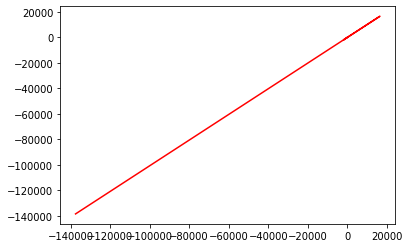

In [4]:
target = sim.target.create(input_data)
network = sim.network.create(input_data)

sim_history = sim.history.create(network)

for t in range(10):
    sim_history.add(target_x=target.x)
    sim_history.add(estimates_of_sensors={"2": network.sensors["2"].estimate})
    
    # Simulation...
    network.make_measurements(target.x)
    
    network.share_info_with_neighbors()
    network.get_info_about_target(target)
    
    network.do_estimations()
    target.update()

sim_history.plot_xy(estimates_of_sensors=["2"])

In [5]:
raw_data

{'simulation': {'total_steps': 1000},
 'target': {'constraints': {'x_initial': [20, 0]},
  'state': {'ss_A': array([[ 0.99987663, -0.01570732],
          [ 0.01570732,  0.99987663]]), 'ss_B': array([[1, 0],
          [0, 1]]), 'dimension': 2},
  'noise': [[1, 0], [0, 1]]},
 'scheme': 'KCF',
 'network': {'indexing_style': 'matlab',
  'adjacency': [[1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1],
   [1, 1, 1, 1, 1],
   [1, 0, 1, 1, 0],
   [0, 1, 1, 0, 1]],
  'n_sensors': 5,
  'observability': {'1': [[100, 0], [0, 100]],
   '2': [[1, 0], [0, 1]],
   '3': [[1, 0], [0, 1]],
   '4': [[1, 0], [0, 1]],
   '5': [[1, 0], [0, 1]]},
  'noise': {'1': [[2, 0], [0, 2]],
   '2': [[20, 0], [0, 20]],
   '3': [[1e-06, 0], [0, 1e-06]],
   '4': [[2, 0], [0, 2]],
   '5': [[2, 0], [0, 2]]}}}

In [6]:
import numpy as np
dir(np.array([[0,1],[1,-4]]))

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__

In [7]:
# from sim.noise import Noise
# from matplotlib.pyplot import plot, show
# x = []
# y = []
# for i in range(200):
#     a = Noise([[0.000002,0],[0,0.000002]]).sample()
#     x.append(a[0])
#     y.append(a[1])
    
# plot(x,y, 'ro')
# show()